# Simplicity and Depression - K means

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression.
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.'
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way
of thinking may never feel that their reality is “good enough”.

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression.
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism
depression adjsimp adjfatal adjdep

Here, "Black and white thinking" is referred as "Simplicity"

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Numerical libraries
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Python Course'

Mounted at /content/drive


In [4]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv(f"{path}/Depression.csv")

In [5]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [6]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [8]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


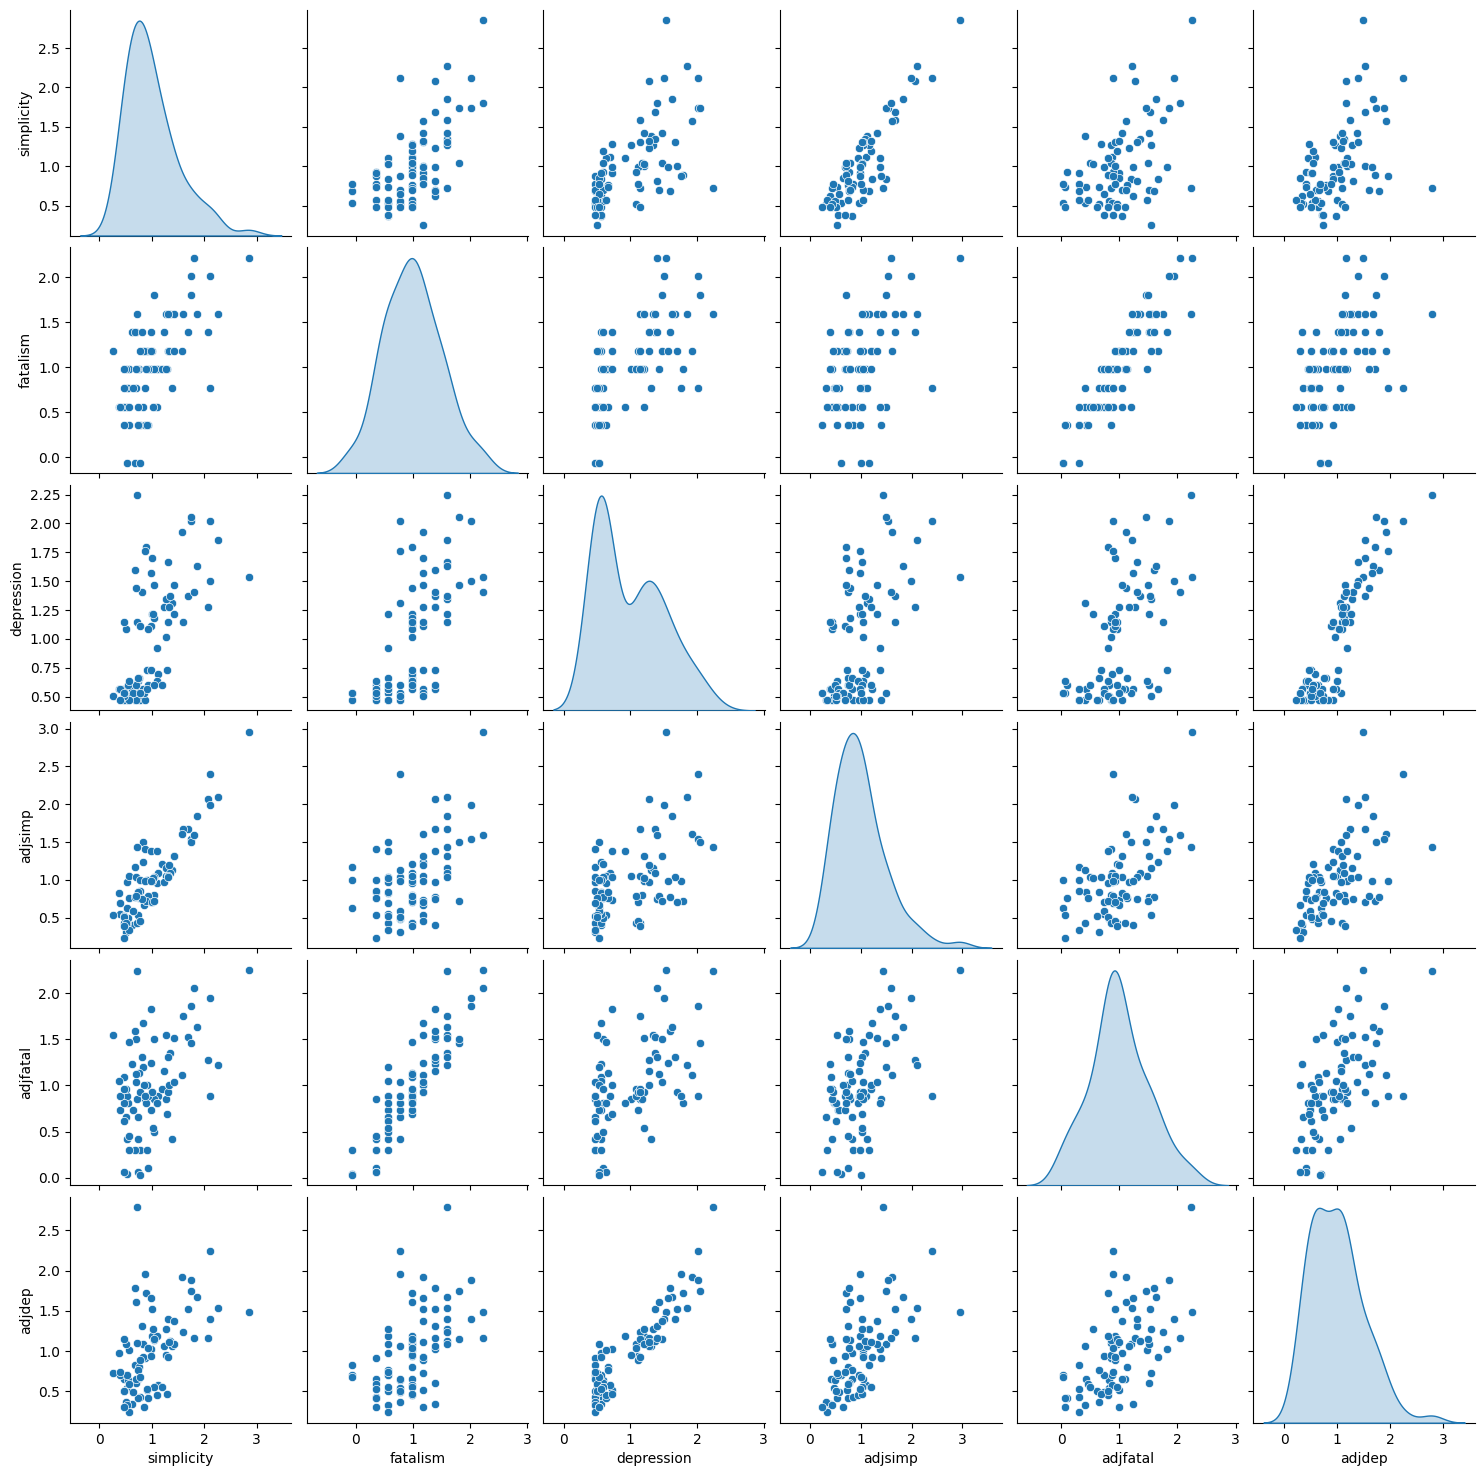

In [9]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde')

In [10]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [11]:
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

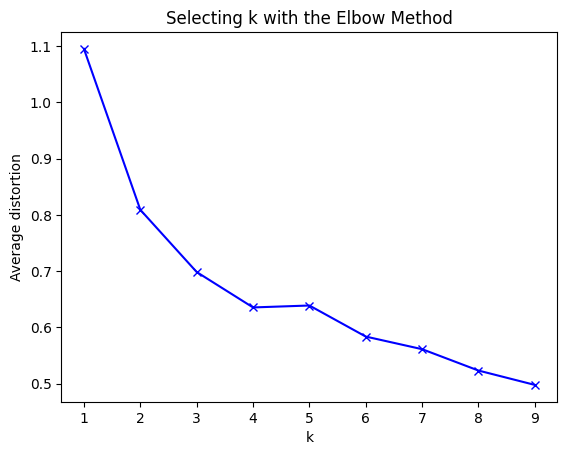

In [12]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [13]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [14]:
kmeans.fit(mydata_z)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [15]:
centroids = kmeans.cluster_centers_

In [16]:
centroids

array([[-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [26]:
centroids.shape

(3, 6)

In [17]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [18]:
print(centroid_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
1   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


#### Cluster 1 has the lowest values and cluster 2 has the highest values

In [19]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [27]:
df_labels

,labels
0,1
1,1
2,1
3,1
4,1
...,...
77,0
78,2
79,2
80,0


In [28]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [29]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs
# to be converted back to dataframe.
df_analysis

<ipython-input-29-2b3fc8139d6b>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs
<ipython-input-29-2b3fc8139d6b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs


,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,2
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,2
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


In [30]:
df_labeled['labels'].value_counts()

,count
labels,
1,37
0,32
2,13


In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
mydata_z

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,-0.141205,-1.296147,-0.807541,-0.484282,-1.797534,-1.169856
1,-0.179157,0.371048,-0.547611,-0.549018,-0.001710,-0.972187
2,-0.938421,-2.129764,-0.937516,-0.761136,-1.935619,-0.589627
3,-0.520827,-1.296147,-0.872518,-0.331588,-1.162751,-0.691450
4,-0.938421,-0.462549,-1.002493,-1.052499,-0.373826,-0.935361
...,...,...,...,...,...,...
77,0.086569,1.621454,0.947011,-0.561092,1.006939,0.300095
78,1.605076,2.455072,0.817056,1.202396,2.113246,0.330884
79,2.250443,-0.462549,2.051748,2.807475,-0.223164,2.504358
80,0.845832,0.371048,0.947011,0.633737,0.081660,0.747633


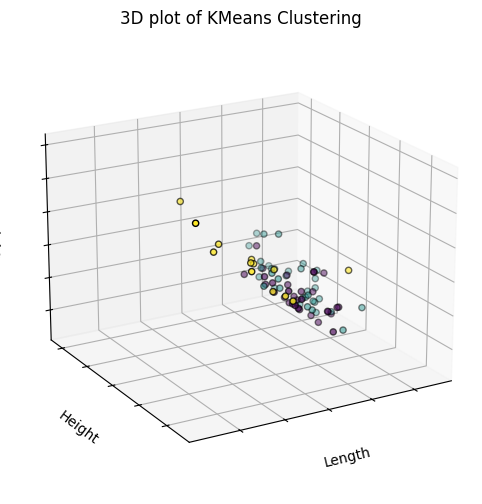

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=20, azim=60)

kmeans.fit(mydata_z)
labels = kmeans.labels_

# Plotting
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 3],
           c=labels.astype('float'), edgecolor='k')
ax.set_xticklabels([])  # Remove x-axis tick labels
ax.set_yticklabels([])  # Remove y-axis tick labels
ax.set_zticklabels([])  # Remove z-axis tick labels

# Labels and title
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

plt.show()

In [36]:
# Let us try with K = 2
final_model=KMeans(2)
final_model.fit(mydata)
prediction=final_model.predict(mydata)

#Append the prediction
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["depression", "GROUP"]]

Groups Assigned : 



,depression,GROUP
0,0.59870,1
1,0.72787,1
2,0.53411,1
3,0.56641,1
4,0.50182,1
...,...,...
77,1.47061,0
78,1.40603,0
79,2.01960,0
80,1.47061,0


In [48]:
colors = sns.color_palette('Set2')

<ipython-input-51-b0627776da03>:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mydata["simplicity"][mydata.GROUP == 0],
<ipython-input-51-b0627776da03>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mydata["simplicity"][mydata.GROUP == 1],


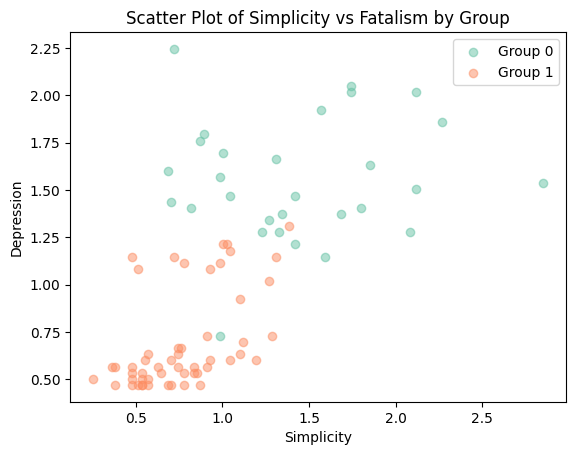

In [51]:
# Plot each group separately
plt.scatter(mydata["simplicity"][mydata.GROUP == 0],
            mydata["depression"][mydata.GROUP == 0],
            c=colors[0], alpha=0.5, label="Group 0")

plt.scatter(mydata["simplicity"][mydata.GROUP == 1],
            mydata["depression"][mydata.GROUP == 1],
            c=colors[1], alpha=0.5, label="Group 1")

# Add labels and legend
plt.xlabel("Simplicity")
plt.ylabel("Depression")
plt.legend()
plt.title("Scatter Plot of Simplicity vs Fatalism by Group")
plt.show()

array([[<Axes: title={'center': 'adjdep'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'adjfatal'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'adjsimp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'depression'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'fatalism'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'simplicity'}, xlabel='[GROUP]'>,
        <Axes: >, <Axes: >]], dtype=object)

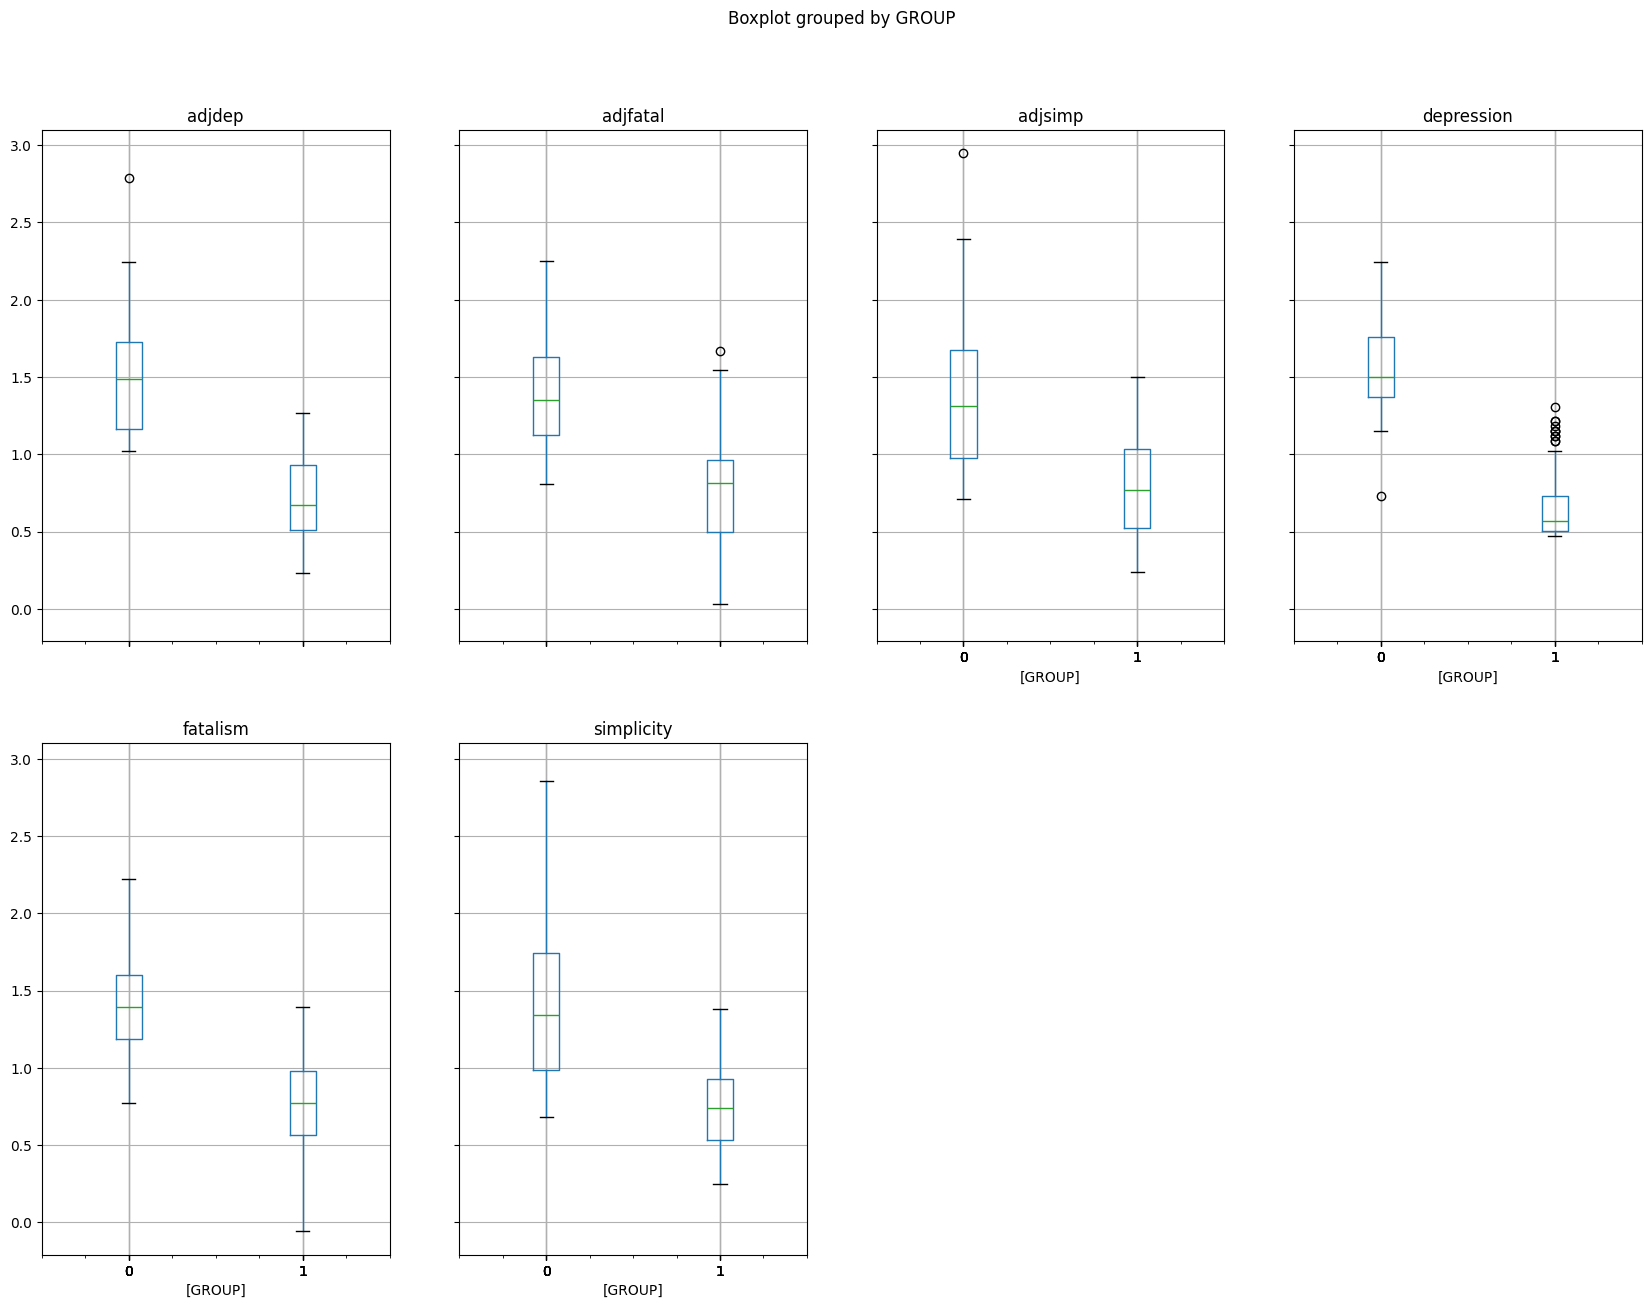

In [44]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [ ]:
# 2 clusters gives a clear separation of high and low values

In [41]:
#To determine if a relationship exists between black and white thinking(simplicity) and depression.
mydata['simplicity'].corr(mydata['depression'])

0.6432667885861316

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be
considered moderate and positive. This means that we can see a clear relationship between black and white thinking and
Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that
higher levels of black and white thinking is associated with higher levels of depression

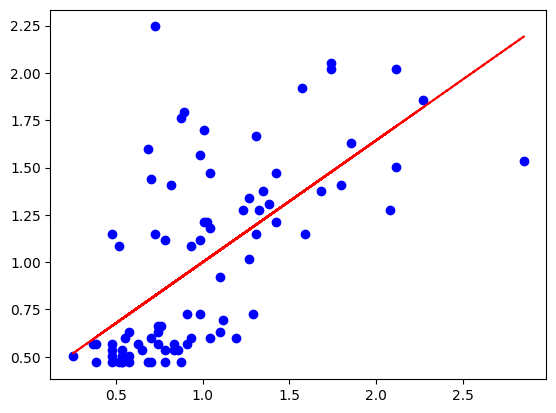

In [42]:
%matplotlib inline
import pandas as pd
plt.plot(mydata['simplicity'], mydata['depression'], 'bo')
z = np.polyfit(mydata['simplicity'], mydata['depression'],1)
p = np.poly1d(z)
plt.plot(mydata['simplicity'], p(mydata['simplicity']), "r--")

#geom_point()

In [ ]:
# As you can see from the above graphic, although the data does not form a perfectly straight line, it does fall in a way that
#indicates a positive relationship. Therefore, we can once again conclude that there is a relationship between black and white
#thinking and depression. It is important to note, however, that correlation does not in any way indicate causality and is merely
#indicative of a relationship between the two.